# Bank Customer's Churn Classification

Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not.

Dataset: https://www.kaggle.com/shrutimechlearn/churn-modelling




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.getcwd()

'/content'

In [3]:
!ls

drive  sample_data


In [0]:
os.chdir('/content/drive/My Drive/App')

In [0]:
import pandas as pd
dataset = pd.read_csv("Churn_Modelling1.csv")

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset.shape

(10000, 14)

In [8]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
# Importing essential libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


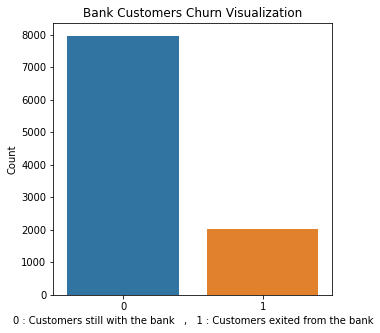

In [18]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(5,5))
sns.countplot(x='Exited', data=dataset)
plt.xlabel('0 : Customers still with the bank   ,   1 : Customers exited from the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [19]:
dataset.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [20]:
dataset.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [0]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(dataset['Geography'], drop_first=True)
gender = pd.get_dummies(dataset['Gender'], drop_first=True)

In [22]:
# Appending columns to original dataframe
dataset = pd.concat([dataset, geography, gender], axis=1)
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [0]:
dataset.drop(['Geography', 'Gender'], axis=1, inplace=True)

Data Preprocessing

• Split the dataset into independent features (ie: X) and label (ie: y).

• Split the dataset further into train and test sets.

• Apply feature scaling to train and test sets of independent features.

In [0]:
features = dataset.drop('Exited', axis=1)
labels = dataset['Exited']

In [29]:
# Splitting the dataset into train and test sets.
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.20,random_state=0)
print('features_train size : {} , features_test size : {}'.format(features_train.shape , features_test.shape))

features_train size : (8000, 11) , features_test size : (2000, 11)


In [0]:
# Feature Scalling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
featurs_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

 Building Artificial Neural Network (ANN)

In [31]:
# Importing the Keras Library & Packages
import keras
from keras.models import  Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
classifier = Sequential()

In [0]:
# Adding the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [0]:
# Adding the Second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [0]:
# Adding the Output Layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [0]:
# Now Compiling the ANN Algorithm
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
# Fitting the ANN to the Training set
model_history = classifier.fit(features_train,labels_train,batch_size = 10 , validation_split=0.33 , epochs = 100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 145us/step - loss: 0.5054 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 143us/step - loss: 0.5053 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 146us/step - loss: 0.5054 - accuracy: 0.7962 - val_loss: 0.5064 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 140us/step - loss: 0.5053 - accuracy: 0.7962 - val_loss: 0.5064 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 145us/step - loss: 0.5055 - accuracy: 0.7962 - val_loss: 0.5063 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 142us/step - loss: 0.5055 - accuracy: 0.7962 - val_loss: 0.5063 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 1s 141us/step

In [39]:
# List all data in history
model_history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

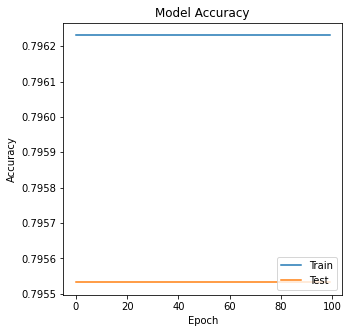

In [44]:
# Summarize history for accuracy
plt.figure(figsize=(5,5))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

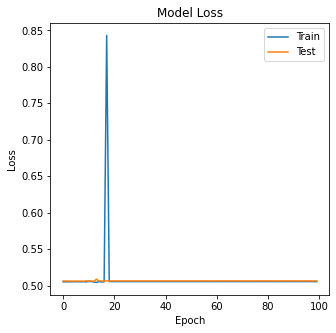

In [45]:
# Summarize history for loss
plt.figure(figsize=(5,5))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Model Evaluation

In [0]:
# Predicting the Test set results
labels_pred = classifier.predict(features_test)

In [47]:
labels_pred

array([[0.20508307],
       [0.2045913 ],
       [0.20523193],
       ...,
       [0.0687016 ],
       [0.1157687 ],
       [0.1841518 ]], dtype=float32)

In [48]:
labels_pred = (labels_pred > 0.5)
labels_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, labels_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [50]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(labels_pred,labels_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 79.75%


# Doing the New Predictions


In [0]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [52]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: Low change of exit.


In [54]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: Low change of exit.
